# Financial Data Project for Different Banks

In this data project we will focus on exploratory data analysis of stock prices. This project is just meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In [5]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.style.use("seaborn")

## Data

We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** In this step, we will get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.

In [7]:
#initialize the start and end date to fetch data

start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016,1,1)

In [8]:
#create a list of bank names(bank codes)

tickers = ['BAC', 'C', 'GS', 'JPM', "MS", 'WFC']

### We will read data from pickle file 

In [9]:
bank_stocks = pd.read_pickle('all_banks')

In [10]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, 
We will be using the concept of **Multi-Level Indexing** documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

In [11]:
#shape
bank_stocks.shape

(2517, 30)

In [12]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2517 non-null   int64  
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2517 non-null   int64  
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2517 non-null   int64  
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

** What is the max Close price for each bank's stock throughout the time period?**

In [13]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [14]:
#using .xs cross section
bank_stocks.xs(key = 'Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

## Calculating the returns on the stock

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

----------------------------
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [15]:
#calculate returns an empty data frame
returns = pd.DataFrame()

In [16]:
#for each bank stock ticker, used pandas pct_change() method to find the percentange change

for eachtick in tickers:
    returns[eachtick + ' Return'] = bank_stocks[eachtick]['Close'].pct_change()

In [17]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


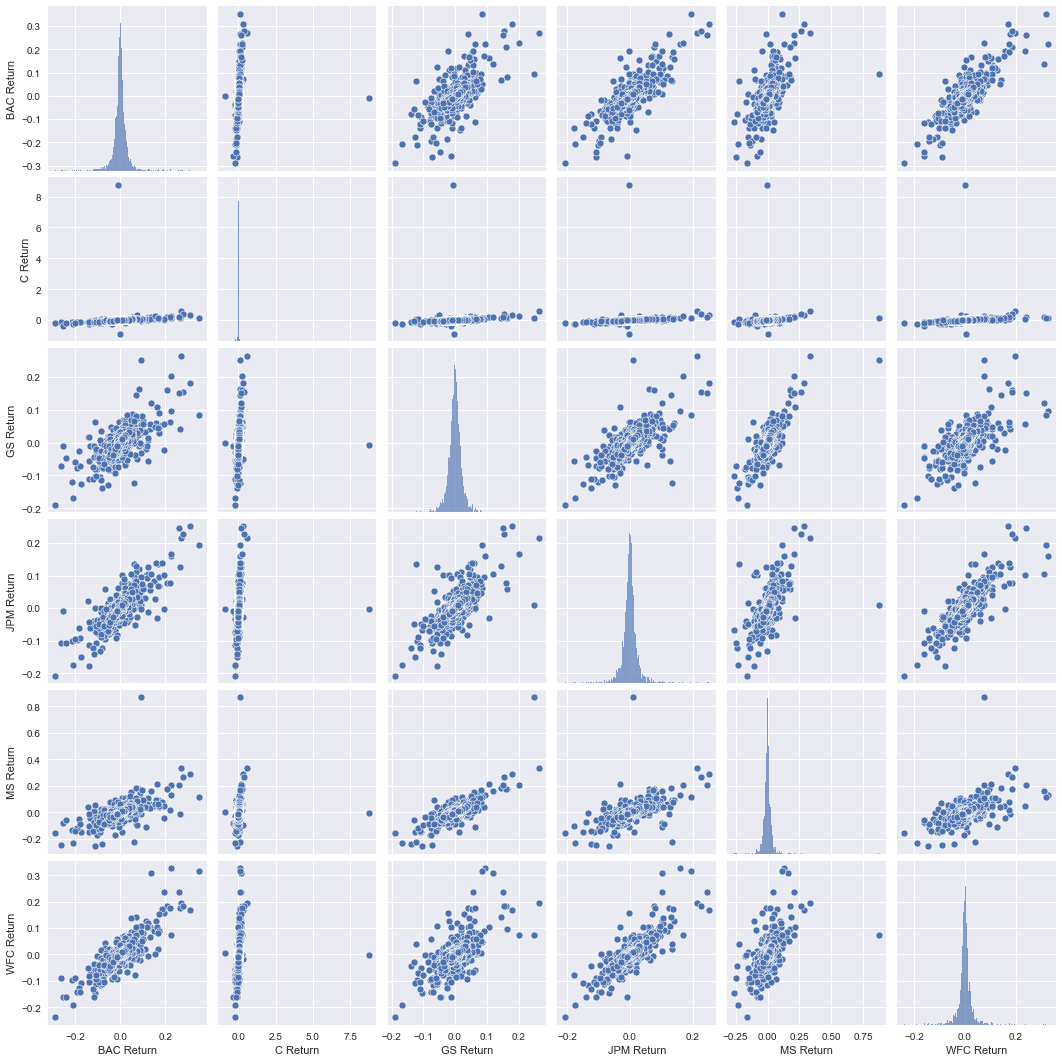

In [18]:
#Creating the pairplot for returns of the bank

sns.pairplot(returns[1:]) 
plt.show()

- In 2008 Citi Group Stock shares falling and dropping the company's market capitalization to US 6 billion, down from US 300 billion two years prior and by november 2008 Citigroup was insolvent.
- Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

** What dates each bank stock had the best and worst single day returns**

In [19]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**4 of the banks worst day return on the barak obama inaugaration day. Coincidence!**

In [20]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

- ** Citigroup's largest drop and biggest gain were very close to one another**. 
- Citigroup announced the effectiveness of its 1-for-10 reverse stock split of Citigroup common stock.
- [Citigroup had a stock split.](https://www.citigroup.com/citi/news/2011/110509a.htm)

<big>
- **Which stock would you classify as the riskiest over the entire time period?**
- **Which would you classify as the riskiest for the year 2015?**

In [21]:
#calculate the standard deviation - indicates the risk
#Overall riskiest over the entire time period

returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

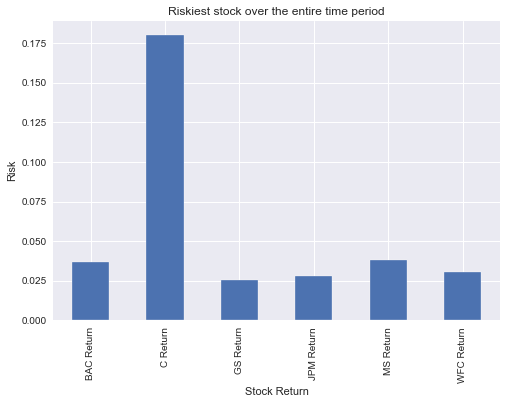

In [22]:
returns.std().plot(kind = "bar")

plt.ylabel("Risk")
plt.xlabel("Stock Return")
plt.title("Riskiest stock over the entire time period")
plt.show()

### Insights:
----
- From the above analysis, we have seen that Citi group has highest standard deviation and hence it is classified as the highest riskiest stock of the entire period.

In [23]:
# riskiest at 2015
returns.loc['2015-01-01' : '2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

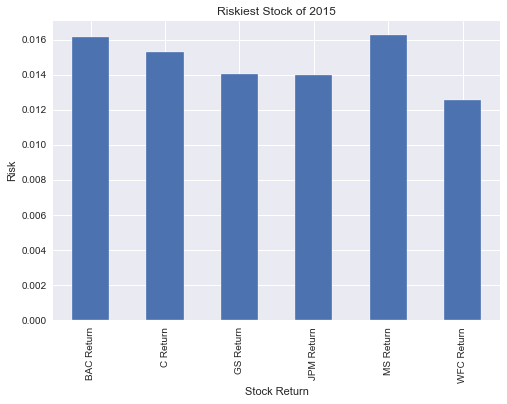

In [24]:
returns.loc['2015-01-01' : '2015-12-31'].std().plot(kind = "bar")

plt.ylabel("Risk")
plt.xlabel("Stock Return")
plt.title("Riskiest Stock of 2015")
plt.show()

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



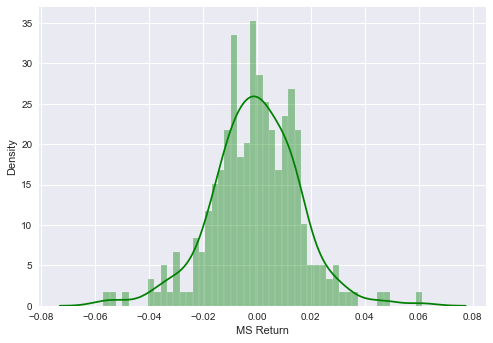

In [25]:
sns.distplot(returns.loc['2015-01-01' : '2015-12-31']['MS Return'],bins = 50, color='green')
plt.show()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



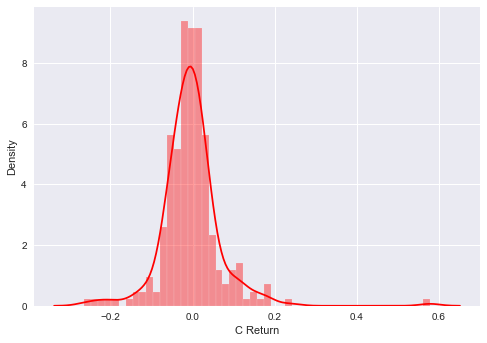

In [26]:
sns.distplot(returns.loc['2008-01-01' : '2008-12-31']['C Return'],color='red', bins=50)

plt.show()

____
# More Visualization

- A lot of this project will focus on visualizations. 
- Visualization libraries seaborn, matplotlib, plotly and cufflinks

In [27]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\HP\anaconda3\python.exe -m pip install --upgrade pip' command.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. **

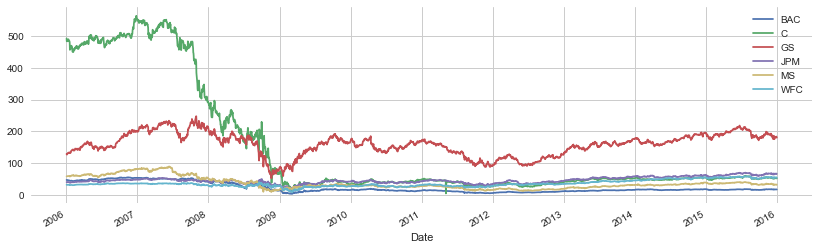

In [29]:
#we will loop through all the banks and plot the close price for each bank into a single plot

for tick in tickers:
    bank_stocks[tick]['Close'].plot(label = tick, figsize = (14,4))

plt.legend()
plt.show()

In [30]:
bank_stocks.xs(key = 'Close',axis=1,level='Stock Info').head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


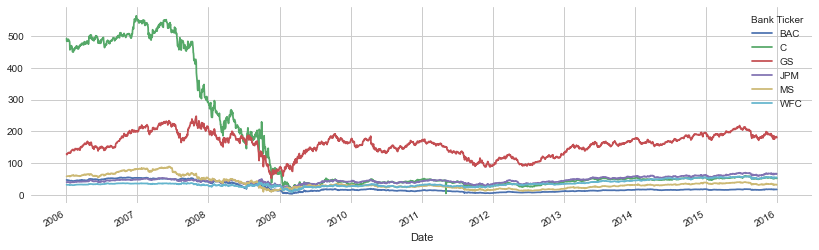

In [31]:
#In this method, we will use pandas .xs to get a cross section of the data.

bank_stocks.xs(key = 'Close',axis=1,level='Stock Info').plot(figsize = (14,4))
plt.show()

In [32]:
bank_stocks.xs(key = 'Close',axis=1,level='Stock Info').iplot()

<big>
- **From the time series plot we have seen that Citi Group is the worst effected bank during the financial crisis and Goldman sachs is the least affected bank during the financial crisis**

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America stock for the year 2008**

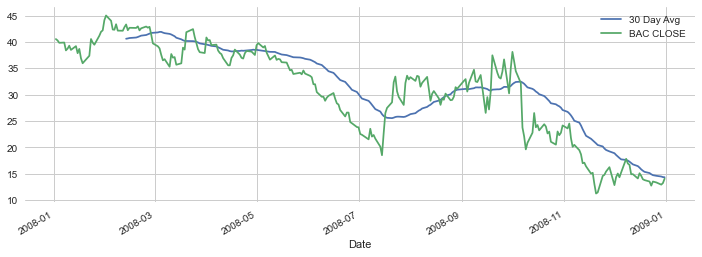

In [33]:
plt.figure(figsize=(12,4))
bank_stocks['BAC']['Close'].loc['2008-01-01' : '2009-01-01'].rolling(window = 30).mean().plot(label = "30 Day Avg")
bank_stocks['BAC']['Close'].loc['2008-01-01': '2009-01-01'].plot(label = "BAC CLOSE")
plt.legend()
plt.show()

** Creating the correlation heatmap between the stocks Close Price.**

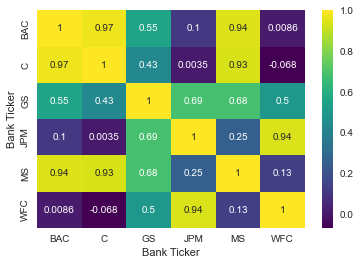

In [34]:
sns.heatmap(bank_stocks.xs(key = "Close", axis=1, level="Stock Info").corr(),annot=True,cmap="viridis")

plt.show()

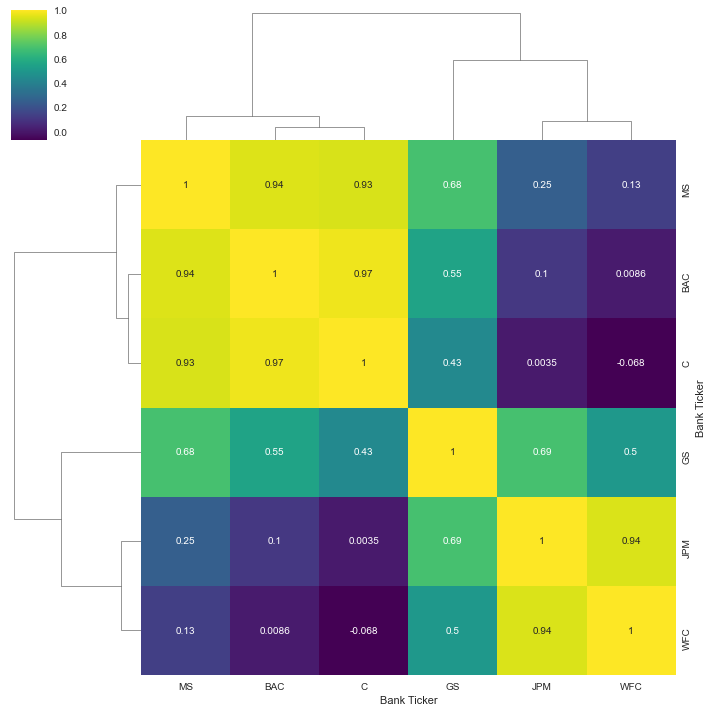

In [35]:
#Create a cluster map for the bank stocks

sns.clustermap(bank_stocks.xs(key = "Close", axis=1, level="Stock Info").corr(),annot=True,cmap="viridis")

plt.show()

<big>
**Creating correlation plot using plotly**

In [36]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project. 

** Use .iplot(kind='candle') to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [37]:
bank_stocks['BAC'][['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01'].head()

Stock Info,Open,High,Low,Close
Date,,,,
2015-01-02,17.99,18.03,17.68,17.90
2015-01-05,17.78,17.81,17.29,17.38
2015-01-06,17.42,17.44,16.78,16.86
2015-01-07,17.14,17.18,16.87,16.94
2015-01-08,17.16,17.34,17.10,17.29


In [38]:
bac15 = bank_stocks['BAC'][['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind = 'candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [39]:
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods = [13, 21, 55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [40]:
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'boll')